In [2]:
reset -sf

In [3]:
import sys
import os
import numpy as np 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib 

In [4]:
PATH = Path("../data/")

dfTrain_ppg = []
for i in range(1,4):
    df = pd.read_csv(str(PATH/str('base/ppg_'+str(i)+'.csv')))
    dfTrain_ppg.append(df)
    
dfTest_ppg = []
for i in [4]:
    df = pd.read_csv(str(PATH/str('base/ppg_'+str(i)+'.csv')))
    dfTest_ppg.append(df)
    
dfTrain_ecg = []
for i in range(1,4):
    df = pd.read_csv(str(PATH/str('base/ecg_'+str(i)+'.csv')))
    dfTrain_ecg.append(df)
    
dfTest_ecg = []
for i in [4]:
    df = pd.read_csv(str(PATH/str('base/ecg_'+str(i)+'.csv')))
    dfTest_ecg.append(df)
    
dfTrain_art = []
for i in range(1,4):
    df = pd.read_csv(str(PATH/str('base/art_'+str(i)+'.csv')))
    dfTrain_art.append(df)
    
dfTest_art = []
for i in [4]:
    df = pd.read_csv(str(PATH/str('base/art_'+str(i)+'.csv')))
    dfTest_art.append(df)
    
dfTrain_ppg = np.vstack((dfTrain_ppg))
dfTest_ppg = np.vstack((dfTest_ppg))
print(dfTrain_ppg.shape, dfTest_ppg.shape)

dfTrain_ecg = np.vstack((dfTrain_ecg))
dfTest_ecg = np.vstack((dfTest_ecg))
print(dfTrain_ecg.shape, dfTest_ecg.shape)

dfTrain_art = np.vstack((dfTrain_art))
dfTest_art = np.vstack((dfTest_art))
print(dfTrain_art.shape, dfTest_art.shape)

(7633, 1250) (2525, 1250)
(7633, 1250) (2525, 1250)
(7633, 1250) (2525, 1250)


In [5]:
#Merge all

In [6]:
dfX_Tr = np.hstack((dfTrain_ppg,dfTrain_ecg))
dfX_Ts = np.hstack((dfTest_ppg,dfTest_ecg))
dfX = np.vstack((dfX_Tr, dfX_Ts))
dfY = np.vstack((dfTrain_art, dfTest_art))
print(dfX.shape, dfY.shape)

tr = int(dfX.shape[0]*.8)
print(tr)
dfX_Train = dfX[:tr]
dfX_Test = dfX[tr:]
dfY_Train = dfY[:tr]
dfY_Test = dfY[tr:]
print(dfX_Train.shape, dfX_Test.shape, dfY_Train.shape, dfY_Test.shape)

(10158, 2500) (10158, 1250)
8126
(8126, 2500) (2032, 2500) (8126, 1250) (2032, 1250)


In [8]:
dfX_Tr = np.hstack((dfTrain_ppg,dfTrain_ecg))
dfX_Ts = np.hstack((dfTest_ppg,dfTest_ecg))
dfX = np.vstack((dfX_Tr, dfX_Ts))
dfY = np.vstack((dfTrain_art, dfTest_art))
print(dfX.shape, dfY.shape)

tr = int(dfX.shape[0]*.8)
val = int(dfX.shape[0]*.9)
print(tr, val-tr, dfX.shape[0]- (val +tr))
dfX_Train = dfX[:tr]
dfX_Val = dfX[tr:val]
dfX_Test = dfX[val:]
dfY_Train = dfY[:tr]
dfY_Val = dfY[tr:val]
dfY_Test = dfY[val:]
print(dfX_Train.shape, dfX_Val.shape, dfX_Test.shape, dfY_Train.shape, dfY_Val.shape, dfY_Test.shape)

np.save(PATH/'train_x', dfX_Train) 
np.save(PATH/'val_x', dfX_Val) 
np.save(PATH/'test_x', dfX_Test)
np.save(PATH/'train_y', dfY_Train)
np.save(PATH/'val_y', dfY_Val)
np.save(PATH/'test_y', dfY_Test)

scaler = StandardScaler().fit(dfX_Train)
joblib.dump(scaler, PATH/'train_scaler_x.pkl')

(10158, 2500) (10158, 1250)
8126 1016 -7110
(8126, 2500) (1016, 2500) (1016, 2500) (8126, 1250) (1016, 1250) (1016, 1250)


['../data/train_scaler_x.pkl']

In [151]:
#Compute train

In [152]:
dfX_Train = pd.DataFrame(dfX_Train, columns=["col" + str(s) for s in range(dfX_Train.shape[1])])
dfX_Train.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col2490,col2491,col2492,col2493,col2494,col2495,col2496,col2497,col2498,col2499
0,1.0743,1.0802,1.1212,1.2092,1.3500,1.5396,1.7664,2.0088,2.2473,2.4399,...,0.49022,0.45992,0.39492,0.33480,0.300100,0.294720,0.294720,0.289830,0.284950,0.394920
1,1.8338,1.8250,1.8152,1.8045,1.7937,1.7820,1.7703,1.7615,1.7537,1.7439,...,0.16471,0.16960,0.16960,0.16960,0.164710,0.154940,0.144670,0.129520,0.104590,0.074780
2,1.3196,1.2962,1.2757,1.2571,1.2405,1.2248,1.2141,1.2063,1.1955,1.1818,...,0.47507,1.03520,1.16570,0.45503,0.024438,-0.020528,0.029814,0.049853,0.069892,0.079668
3,1.1388,1.1183,1.1026,1.0899,1.0743,1.0577,1.0411,1.0264,1.0137,1.0020,...,0.28006,0.26979,0.24487,0.20479,0.174980,0.144670,0.109480,0.079668,0.074780,0.079668
4,1.3969,1.6227,1.8680,2.1095,2.3275,2.5083,2.6354,2.7204,2.7859,2.8280,...,0.30499,0.31965,0.32502,0.32991,0.329910,0.329910,0.329910,0.329910,0.325020,0.325020


In [153]:
scaler = StandardScaler().fit(dfX_Train.values)
print(dfX_Train.values.shape)
print(dfX_Train.iloc[0,:].shape)
img = scaler.transform(dfX_Train.iloc[0,:].values.reshape(1, -1))
print(img.shape)
joblib.dump(scaler, PATH/'train_scaler.pkl') 

(8126, 2500)
(2500,)
(1, 2500)


['../data/train_scaler.pkl']

In [154]:
ids = ["img_" + str(d) +".npy" for d in dfX_Train.index.values]
print(len(ids), np.max(dfX_Train.index.values))

8126 8125


In [156]:
#Store each row as numpy
for d in dfX_Train.index.values:
    np.save(PATH/'train'/ids[d], dfX_Train.iloc[d].values)
    if (d % 500 == 0) and (d!= 0):
        print("Saving image:", d)        

Saving image: 500
Saving image: 1000
Saving image: 1500
Saving image: 2000
Saving image: 2500
Saving image: 3000
Saving image: 3500
Saving image: 4000
Saving image: 4500
Saving image: 5000
Saving image: 5500
Saving image: 6000
Saving image: 6500
Saving image: 7000
Saving image: 7500
Saving image: 8000


(2500,)
(1, 2500)
-1.6582961186589278 3.058396680527547


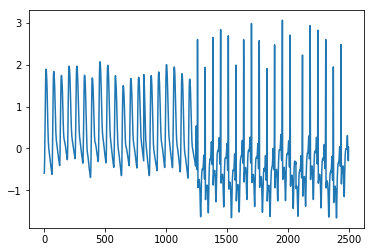

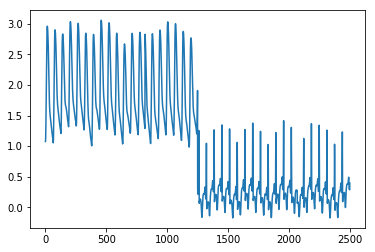

In [163]:
scaler = joblib.load(PATH/'train_scaler.pkl') 

img = np.load(PATH/'train'/ids[0])
print(img.shape)
img_scaled = scaler.transform(img.reshape(1,-1))
print(img_scaled.shape)
print(np.min(img_scaled), np.max(img_scaled))
plt.plot(img_scaled.T)
plt.show()
plt.plot(img.T)
plt.show()

In [164]:
#Create column with file name
cols = ["id"]
cols.extend(["col" + str(s) for s in range(dfY_Train.shape[1])])
print(len(cols))

print(dfY_Train.shape)
dfY_Train = np.hstack((np.array(ids).reshape(-1,1),dfY_Train))
dfY_Train = pd.DataFrame(dfY_Train, columns=cols)
dfY_Train.head()

1251
(8126, 1250)


,id,col0,col1,col2,col3,col4,col5,col6,col7,col8,...,col1240,col1241,col1242,col1243,col1244,col1245,col1246,col1247,col1248,col1249
0,img_0.npy,84.305,83.426,83.133,82.986,82.791,82.54700000000001,82.25299999999999,82.05799999999999,82.009,...,86.943,85.37899999999999,84.354,83.719,83.23,82.84,82.49799999999999,82.156,81.863,81.667
1,img_1.npy,113.76,115.42,116.2,116.0,114.98,113.61,111.85,109.75,107.31,...,66.184,65.35300000000001,64.62100000000001,64.23,64.132,63.937,63.54600000000001,63.058,62.373999999999995,61.446000000000005
2,img_2.npy,124.02,121.82,119.23,116.44,113.32,110.0,106.43,102.82,99.105,...,82.351,82.05799999999999,81.667,81.423,81.13,80.788,80.446,79.90899999999999,79.372,78.737
3,img_3.npy,136.57,133.93,130.85,127.68,124.31,120.74,117.13,113.37,109.51,...,66.623,66.184,65.744,65.305,64.816,64.47399999999999,64.718,66.868,72.045,80.788
4,img_4.npy,83.23,83.719,84.15799999999999,84.5,84.598,84.5,84.256,83.914,83.62100000000001,...,141.31,137.35,133.98,131.88,130.8,130.41,129.83,128.51,126.26,123.14


In [165]:
train_csv = PATH/'train.csv'
dfY_Train.to_csv(train_csv, index=False)

In [166]:
#Test

In [167]:
dfX_Test = pd.DataFrame(dfX_Test, columns=["col" + str(s) for s in range(dfX_Test.shape[1])])
dfX_Test.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col2490,col2491,col2492,col2493,col2494,col2495,col2496,col2497,col2498,col2499
0,2.9668,2.9150,2.8543,2.7849,2.7077,2.6246,2.5386,2.46140,2.39000,2.3167,...,0.24023,0.24512,0.25000,0.24512,0.25488,0.25000,0.25488,0.25000,0.25488,0.24512
1,2.5552,2.4976,2.4360,2.3705,2.3021,2.2317,2.1681,2.10850,2.04300,1.9765,...,0.25488,0.24512,0.24023,0.23486,0.25000,0.22510,0.22998,0.24023,0.24512,0.22998
2,1.0802,1.0674,1.0557,1.0440,1.0313,1.0176,1.0029,0.99022,0.98534,0.9912,...,0.29004,0.43994,0.62012,0.76514,0.66016,0.39502,0.19531,0.16992,0.18018,0.16016
3,1.8123,1.7830,1.7566,1.7322,1.7087,1.6862,1.6637,1.64130,1.61580,1.5885,...,0.35498,0.32520,0.33008,0.29492,0.30518,0.30029,0.28027,0.26025,0.25488,0.24512
4,2.0802,2.0313,1.9932,1.9619,1.9296,1.8954,1.8622,1.82990,1.79770,1.7634,...,0.32520,0.30518,0.27002,0.25488,0.24023,0.22021,0.18506,0.18018,0.20508,0.19531


In [168]:
ids = ["img_" + str(d) +".npy" for d in dfX_Test.index.values]
print(len(ids), np.max(dfX_Test.index.values))

2032 2031


In [169]:
#Store each row as numpy
for d in dfX_Test.index:
    np.save(PATH/'test'/ids[d], dfX_Test.iloc[d].values)
    if (d % 500 == 0) and (d!= 0):
        print("Saving image:", d)

Saving image: 500
Saving image: 1000
Saving image: 1500
Saving image: 2000


In [170]:
#Create column with file name
cols = [id]
cols.extend(["col" + str(s) for s in range(dfY_Test.shape[1])])

print(dfY_Test.shape)
dfY_Test = np.hstack((np.array(ids).reshape(-1,1),dfY_Test))
dfY_Test = pd.DataFrame(dfY_Test, columns=cols)
dfY_Test.head()

(2032, 1250)


,<built-in function id>,col0,col1,col2,col3,col4,col5,col6,col7,col8,...,col1240,col1241,col1242,col1243,col1244,col1245,col1246,col1247,col1248,col1249
0,img_0.npy,86.50299999999999,85.721,84.98899999999999,84.305,83.572,82.93700000000001,82.25299999999999,81.618,80.984,...,133.54,129.93,125.72,121.23,116.54,112.05,107.85,104.23,101.06,98.37200000000001
1,img_1.npy,72.24,71.752,71.215,70.726,70.28699999999999,69.847,69.407,68.968,68.528,...,163.82,164.26,164.31,164.17,163.73,163.19,162.31,161.14,159.57,157.47
2,img_2.npy,163.48,161.38,158.79,155.76,152.1,147.95,143.16,138.13,132.81,...,87.28399999999999,86.50299999999999,85.721,84.98899999999999,84.305,83.67,83.133,82.54700000000001,82.009,81.423
3,img_3.npy,87.626,86.74700000000001,86.06299999999999,85.575,85.184,84.54899999999999,83.816,83.133,82.742,...,106.92,106.14,105.16,104.18,103.16,102.18,101.16,100.18,99.105,98.12799999999999
4,img_4.npy,126.95,126.7,126.51,126.26,126.07,125.82,125.58,125.29,125.14,...,136.42,134.57,133.0,131.68,130.66,129.73,129.0,128.31,127.68,127.14


In [171]:
test_csv = PATH/'test.csv'
dfY_Test.to_csv(test_csv, index=False) 

(2500,)
(1, 2500)
-0.7338608042885776 2.0926702915724023


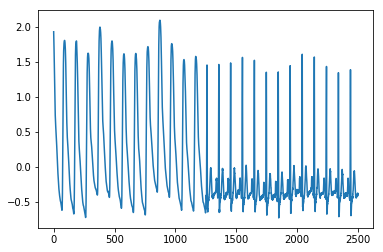

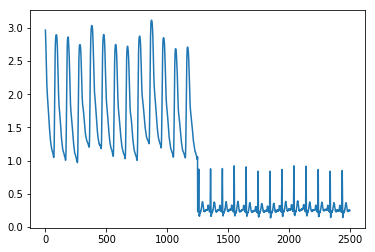

In [172]:
#Show test image

scaler = joblib.load(PATH/'train_scaler.pkl') 
img = np.load(PATH/'test'/ids[0])
print(img.shape)
img_scaled = scaler.transform(img.reshape(1,-1))
print(img_scaled.shape)
print(np.min(img_scaled), np.max(img_scaled))
plt.plot(img_scaled.T)
plt.show()
plt.plot(img.T)
plt.show()